# Facial Emotion Recognition | VGG19 Model - FER2013 Dataset

![](https://www.researchgate.net/publication/349055345/figure/fig3/AS:987834383085568@1612529478973/FER-2013-sample-images-for-facial-emotion-recognition.jpg)

* Fer2013 dataset is a common dataset used for facial expression recognition. The dataset contains 35,887 grayscale facial images containing 7 different emotions (anger, disgust, fear, happiness, neutral, sad, and surprise).

* VGG19 is a deep learning model known as the Convolutional Neural Network (CNN) architecture. The VGG19 model has 19 layers and consists of 16 layers of convolutional layers and 3 layers of fully connected layers. Convolutional layers extract features from the input image using filters.

* Transfer learning can be performed using the pre-trained weights of the VGG19 model. Transfer learning is the use of the weights of a pre-trained model to help solve a problem in a new dataset.

* For the VGG19 model, pre-trained weights are often used to classify images in the ImageNet dataset. Therefore, the last layer of the VGG19 model is retrained to make it suitable for facial expressions in the fer2013 dataset.

* The last layer of the VGG19 model consists of fully connected layers. These layers are used to classify facial expressions in the dataset. Since there are 7 different emotion classes in the Fer2013 dataset, the last layer of the VGG19 model is retrained to have a 7-output classifier.

* Retraining of the VGG19 model is performed with multiple epochs to achieve higher accuracy rates. An epoch is a complete scan of the training data by the model once.

* During training, performance metrics such as model accuracy and loss are tracked. At the end of the training, the accuracy of the model is evaluated by its performance on the test data.
* The VGG19 model gives very good results for the classification of facial expressions in the Fer2013 dataset. However, there may be imbalance between classes in the dataset. Therefore, taking into account the imbalance of training data between classes can help improve the performance of the model.

* To further improve the performance of the model, data preprocessing techniques can be used. For example, the sizes of faces in the dataset can be standardized and filtering techniques can be applied to reduce noise.

* The VGG19 model is a widely used model in the field of facial expression recognition in the Fer2013 dataset. However, there are other models that perform better on different datasets. Therefore, different models may be preferred depending on the characteristics of the data set and the problem area.

* Finally, different metrics can be used to evaluate the performance of the model. For example, metrics such as accuracy, sensitivity, specificity, F1 score, and ROC curve can help evaluate model performance from different perspectives.

## Library

In [1]:
!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator,load_img
#from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [4]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=6ce513dec565381b2002d3087aa642259e52ff2aab95ee4ff2b936a512d3f6a3
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
!unzip /content/drive/MyDrive/PruebaTecnicaArkangelAI/fer2013.csv.zip

Archive:  /content/drive/MyDrive/PruebaTecnicaArkangelAI/fer2013.csv.zip
  inflating: fer2013.csv             


In [107]:
df = pd.read_csv('fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [108]:
df = pd.DataFrame(df)
#df = df.iloc[:15000]

In [109]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [111]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [110]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [112]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

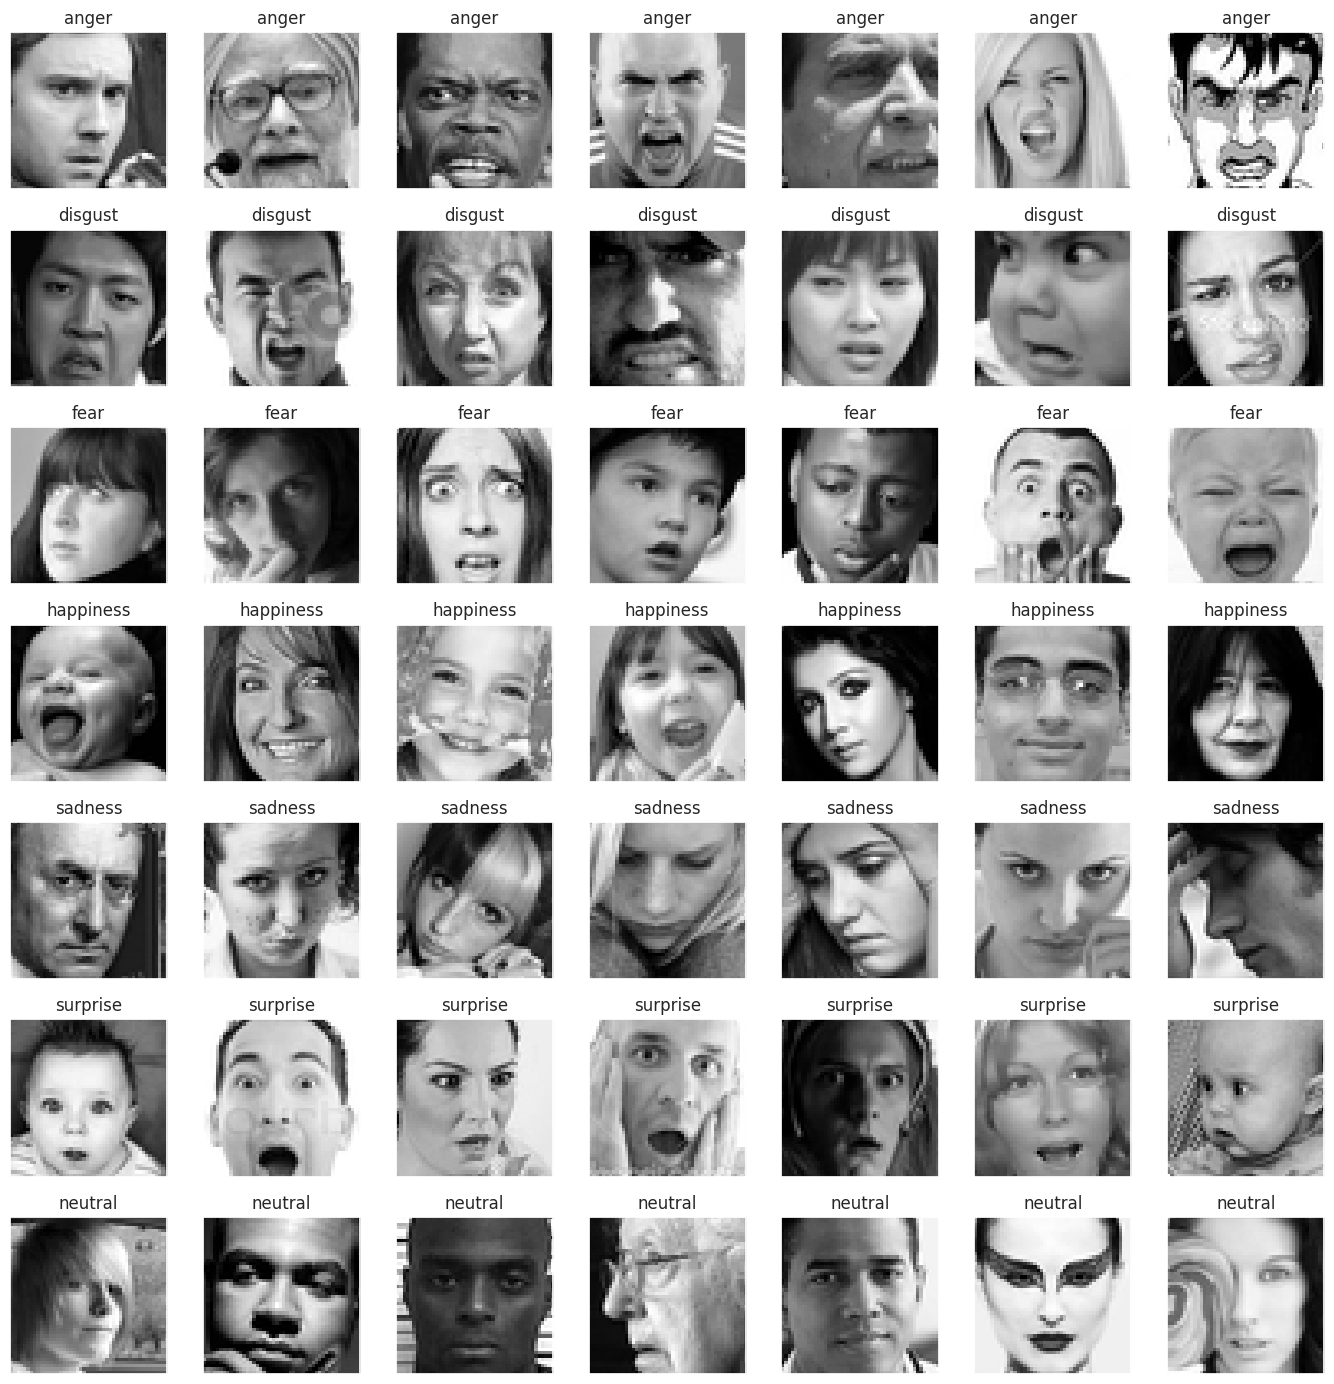

In [113]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

### Now I will make the data compatible for neural networks.

In [114]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array = np.stack(img_array, axis = 0)

In [115]:
img_array.shape

(35887, 48, 48)

In [116]:
img_features = []

for i in range(len(img_array)):
    temp = cv2.cvtColor(img_array[i], cv2.COLOR_GRAY2RGB)
    img_features.append(temp)

img_features = np.array(img_features)
print(img_features.shape)

(35887, 48, 48, 3)


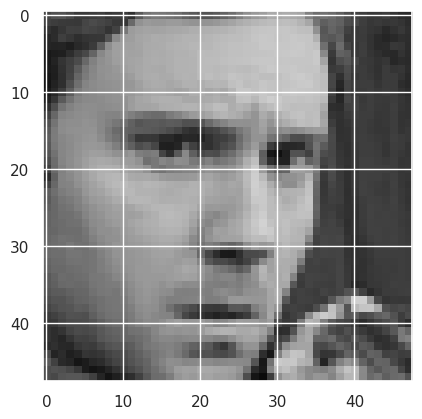

In [117]:
pyplot.imshow(img_features[0].astype(np.uint8));

In [118]:
le = LabelEncoder()

img_labels = le.fit_transform(df.emotion)
img_labels = tf.keras.utils.to_categorical(img_labels)
img_labels.shape

(35887, 7)

In [119]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


### Splitting the data into training and validation set.

In [120]:
X_train, X_valid, y_train, y_valid = train_test_split(img_features,
                                                      img_labels,
                                                      shuffle = True,
                                                      stratify = img_labels,
                                                      test_size = 0.1,
                                                      random_state = 42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((32298, 48, 48, 3), (3589, 48, 48, 3), (32298, 7), (3589, 7))

In [121]:
del df
del img_features
del img_labels

In [122]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

### Normalizing results, as neural networks are very sensitive to unnormalized data.

In [123]:
X_train = X_train / 255.
X_valid = X_valid / 255.

In [124]:
vgg = tf.keras.applications.VGG19(weights = 'imagenet',
                                  include_top = False,
                                  input_shape = (48, 48, 3))

This code makes all layers of a VGG19 model non-trainable. This allows the model to be applied to a new problem using only pre-learned features, rather than reflecting changes in the training data to the model, while preserving the pre-trained weights. This is a technique often used in transfer learning applications.

In particular, while developing a facial emotion recognition model using the VGG19 model, the pre-trained weights of the model are preserved, allowing it to be used in solving a new emotion recognition problem. In this way, it may be possible to obtain better results using less data.

In [125]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [126]:
def build_model(bottom_model, classes):
    model = bottom_model.layers[-2].output
    model = GlobalAveragePooling2D()(model)
    model = Dense(classes, activation = 'softmax', name = 'out_layer')(model)

    return model

In [127]:
head = build_model(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = head)

print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

### I used two callbacks one is `early stopping` for avoiding overfitting training data and other `ReduceLROnPlateau` for learning rate.


In [128]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0.00005,
                               patience = 10,
                               verbose = 1,
                               restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 factor = 0.5,
                                 patience = 7,
                                 min_lr = 1e-7,
                                 verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

### As the data in hand is less as compared to the task so ImageDataGenerator is good to go.

In [129]:
train_datagen = ImageDataGenerator(rotation_range = 15,
                                   width_shift_range = 0.15,
                                   height_shift_range = 0.15,
                                   shear_range = 0.15,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,)
train_datagen.fit(X_train)

In [130]:
# batch size of 32 performs the best.
batch_size = 32
epochs = 40
optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
              optimizer = optims[0],
              metrics = ['accuracy'])

In [131]:
history = model.fit(train_datagen.flow(X_train,
                                       y_train,
                                       batch_size = batch_size),
                                       validation_data = (X_valid, y_valid),
                                       steps_per_epoch = len(X_train) / batch_size,
                                       epochs = epochs,
                                       callbacks = callbacks,
                                       use_multiprocessing = True)

Epoch 1/40
1009/1009 [==============================] - 72s 64ms/step - loss: 1.4764 - accuracy: 0.4162 - val_loss: 1.2150 - val_accuracy: 0.5350 - lr: 1.0000e-04
Epoch 2/40
1009/1009 [==============================] - 64s 64ms/step - loss: 1.2260 - accuracy: 0.5318 - val_loss: 1.1531 - val_accuracy: 0.5676 - lr: 1.0000e-04
Epoch 3/40
1009/1009 [==============================] - 63s 62ms/step - loss: 1.1497 - accuracy: 0.5638 - val_loss: 1.0702 - val_accuracy: 0.5965 - lr: 1.0000e-04
Epoch 4/40
1009/1009 [==============================] - 63s 62ms/step - loss: 1.0891 - accuracy: 0.5879 - val_loss: 1.0380 - val_accuracy: 0.6219 - lr: 1.0000e-04
Epoch 5/40
1009/1009 [==============================] - 62s 61ms/step - loss: 1.0508 - accuracy: 0.6074 - val_loss: 1.0191 - val_accuracy: 0.6233 - lr: 1.0000e-04
Epoch 6/40
1009/1009 [==============================] - 64s 63ms/step - loss: 1.0065 - accuracy: 0.6213 - val_loss: 0.9840 - val_accuracy: 0.6431 - lr: 1.0000e-04
Epoch 7/40
1009/1009 [

In [132]:
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

model.save("modelb.h5")

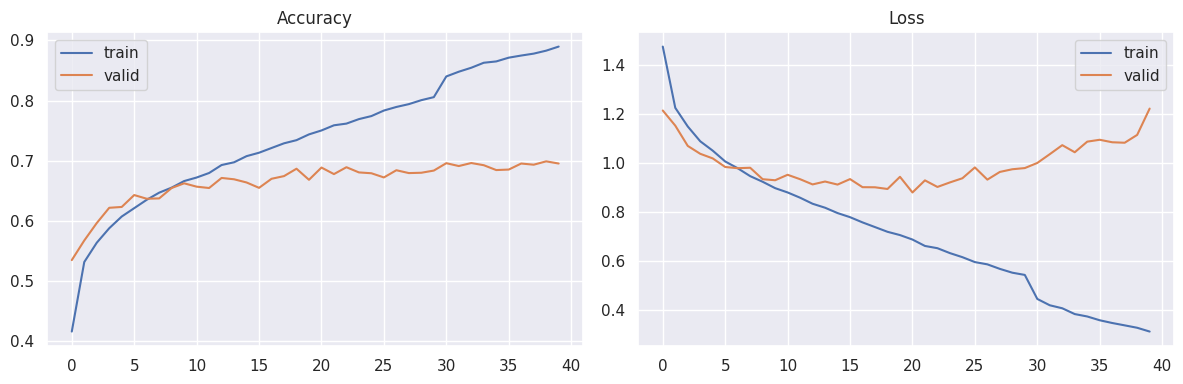

In [133]:
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()


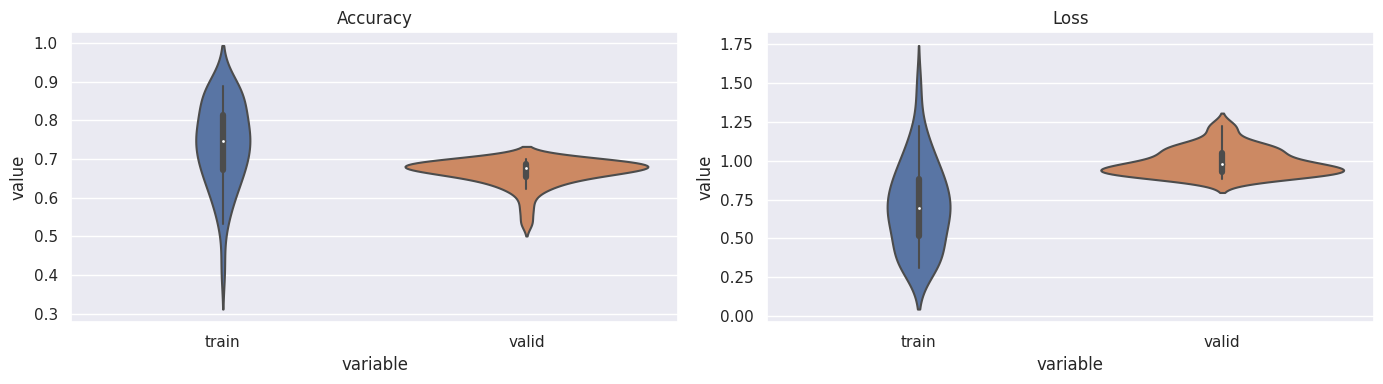

In [134]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = pyplot.figure(0, (14, 4))
ax = pyplot.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('performance_dist.png')
pyplot.show()

113/113 [==============================] - 2s 14ms/step
total wrong validation predictions: 1093


              precision    recall  f1-score   support

           0       0.60      0.70      0.65       495
           1       0.91      0.58      0.71        55
           2       0.65      0.49      0.56       512
           3       0.89      0.84      0.86       899
           4       0.59      0.54      0.56       608
           5       0.82      0.74      0.78       400
           6       0.59      0.78      0.67       620

    accuracy                           0.70      3589
   macro avg       0.72      0.67      0.69      3589
weighted avg       0.71      0.70      0.69      3589



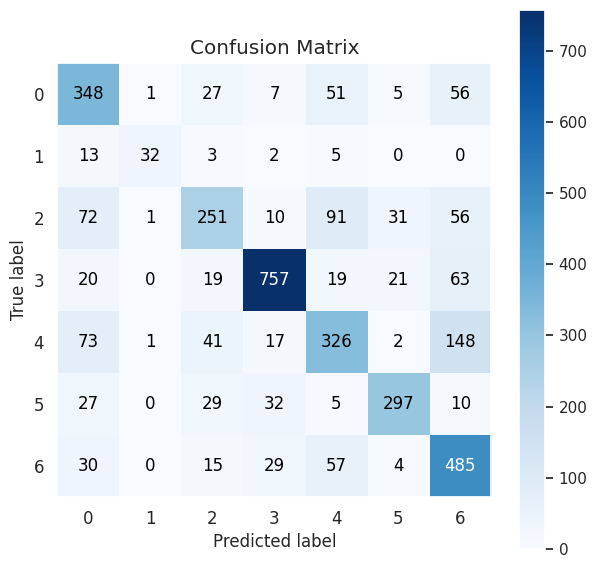

In [135]:
yhat_valid = np.argmax(model.predict(X_valid), axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

### The confusion matrix clearly shows that our model is doing good job on the class happy but it's performance is low on other two classes. One of the reason for this could be the fact that these two classes have less data. But when I looked at the images I found some images from these two classes are even hard for a human to tell whether the person is sad or neutral. Facial expression depends on individual as well. Some person's neutral face looks like sad.

In [136]:
mapper = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'
}

1/1 [==============================] - 0s 22ms/step


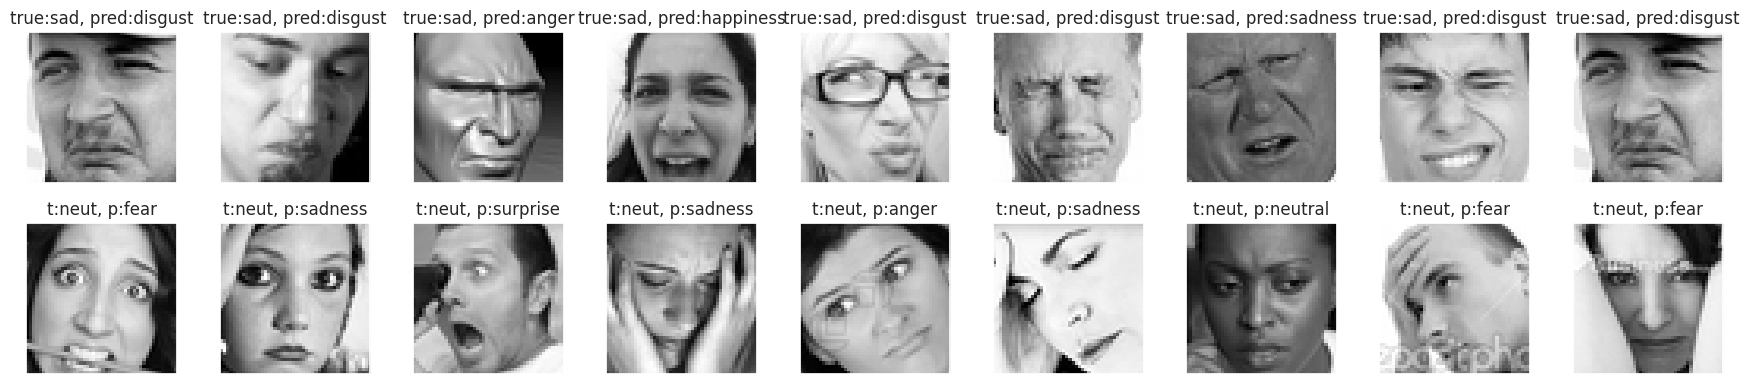

In [137]:
np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2]==1)[0], size=9)

fig = pyplot.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
        ax = pyplot.subplot(2, 9, i+1)
        sample_img = X_valid[sadidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_GRAY2RGB)

        ax.set_title(f"true:sad, pred:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,3))[0])]}")

        ax = pyplot.subplot(2, 9, i+10)
        sample_img = X_valid[neuidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_GRAY2RGB)

        ax.set_title(f"t:neut, p:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,3))[0])]}")

        pyplot.tight_layout()

In [139]:
preds = model.predict(X_valid)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 2s 17ms/step


In [140]:
y_pred.shape

(3589,)

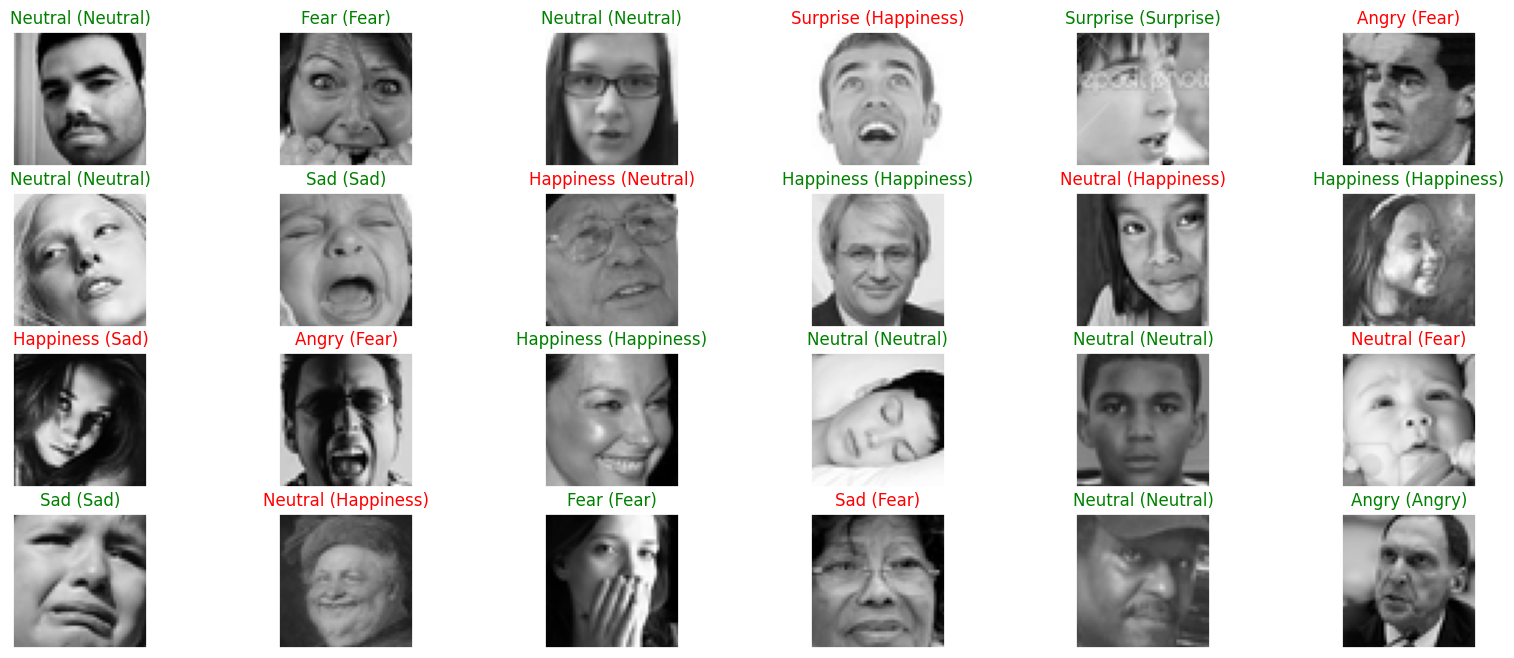

In [142]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_valid.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_valid[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_valid,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

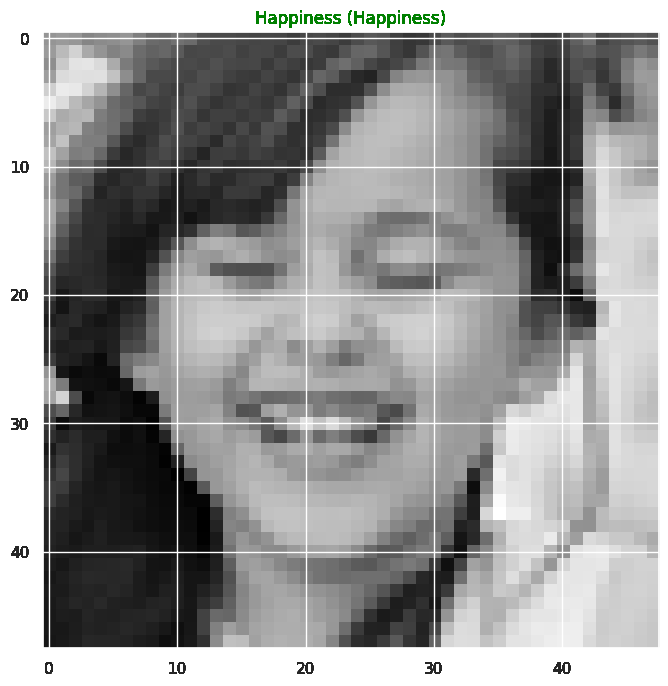

In [156]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

img_num = 400
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(X_valid[img_num]):
    ax = figure.add_subplot(1, 1, 1)
    ax.imshow(np.squeeze(X_valid[img_num]))
    predict_index = label_dict[(y_pred[img_num])]
    true_index = label_dict[np.argmax(y_valid,axis=1)[img_num]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

Figure(2000x800)
Happiness


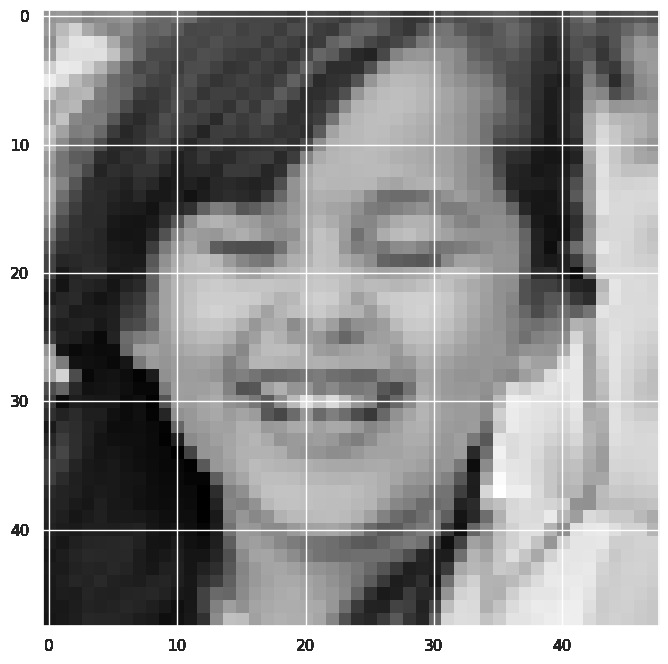

In [165]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

img_num = 400
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(X_valid[img_num]):
    ax = figure.add_subplot(1, 1, 1)
    ax.imshow(np.squeeze(X_valid[img_num]))
    predict_index = label_dict[(y_pred[img_num])]

print(figure)
print(predict_index)